# Business case: Understanding profitability in the US financial market

# 1. Case Description

You were hired as a data scientist in an important mutual fund firm in the department of financial analysis. The firm has been doing financial analysis and financial forecast for several years. You were hired to come up with alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

You have to analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. You will receive this dataset in a .csv format.

You have to carefully read the data dictionary to understand each variable and the dataset to understand its structure.

# 2. Business Questions

In [177]:
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount("/content/gdrive")  
!pwd  # show current path 

%cd "/content/gdrive/MyDrive/IA95022"
!ls  # show current directory

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA95022
/content/gdrive/MyDrive/IA95022
 bezdekIris.data	      iris.data			'Store Sales'	   Wine
 class_060922_starter.ipynb   iris.names		 train.csv
 DryBeanDataset		     'Modulo 4'			 us2022q2a.csv
 Index			      notebookdc8e90834b.ipynb	 usfirms2022.csv


In [178]:
# Carga de datos
usdata = pd.read_csv('us2022q2a.csv')
usfirms = pd.read_csv('usfirms2022.csv')
# Unimos la información de ambos datasets en un solo dataframe
usfirms.columns = usfirms.columns.str.replace('Ticker', 'firm')
df = pd.merge(usfirms, usdata, on="firm")

In [179]:

df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")

df.set_index(['firm', 'qdate'], drop = True)

df.index
df.columns
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['r'] = np.log(df['adjprice']) - np.log(df['lprice'])
df['r2']= np.log(df['adjprice']) - np.log(df.groupby(['firm'])['adjprice'].shift(4))
df.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]
df[['q', 'adjprice', 'lprice']]
df.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98]



,adjprice,lprice


# 2.2.1 About Descriptive Statistics

## 2.2.1 Considering the most recent financial quarter of the database:

## Show how many firms by industry there are in the sample

In [180]:
# Obtenemos el conteo de las industrias utilizando el dataset que solo contiene
# la información de las empresas, basándonos en la columna de su industria
mask = df['q']=='2022q2' 
a = df['Sector NAICS\nlevel 1'][mask].value_counts()

a

Manufacturing                                                               1565
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

In [181]:
import plotly.express as px


En la gráfica que se muestra a continuación, vemos que la mayor parte de las empresas pertenecer a la categoría de manufactura y finanzas. Es interesante ver que el primer puesto representa más del doble del segundo puesto. 

Esto mismo se repite entre el segundo y tercer puesto, y conforme vamos bajando la diferencia se va haciendo menor.

In [ ]:
px.bar(a,title="Cantidad de empresas por categoría")

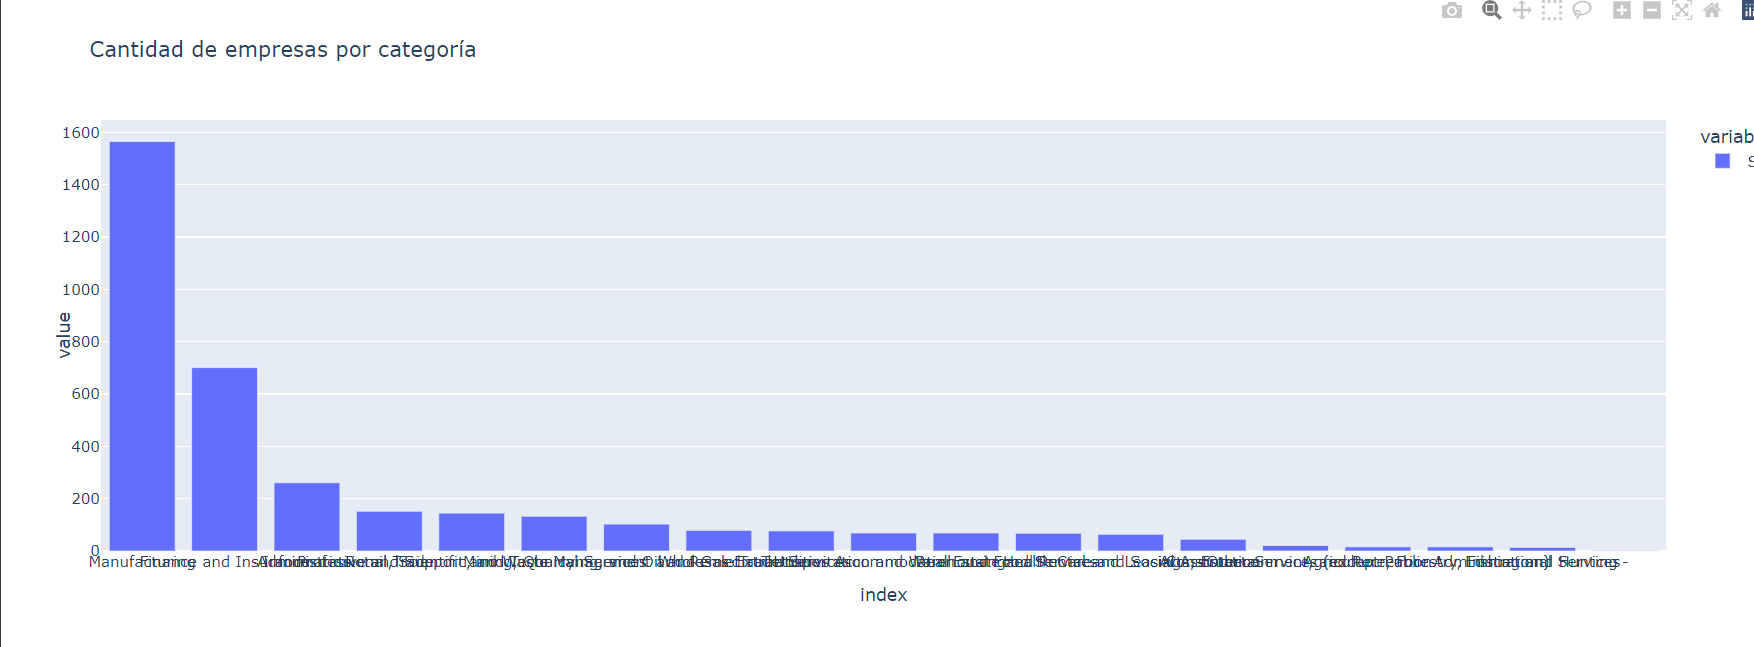

## For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [183]:
# Calculamos las variables para cada instancia de los datos

# reemplazamos los nan por 0 para evitar divisiones erroneas
df['revenue'] = df['revenue'].fillna(0)


# Calculo de medidas que nos ayudan a comprender el Profit Margin
df['Book'] = df['totalassets'] - df['totalliabilities']
df['Market'] = df['originalprice'] * df['sharesoutstanding']
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df["OPM"] = df["Ebit"] / df["revenue"]
df["Net income"] = df["Ebit"] - df["incometax"] - df["finexp"]
df["Profit margin"] = df["Net income"] / df["revenue"]

In [184]:
df2 = df.drop(["revenue","cogs","sgae","OPM","stockholderequity","Ebit","sharesoutstanding","Net income","incometax","finexp","longdebt","otheropexp","totalassets","shortdebt","totalliabilities","originalprice","OPM","fiscalmonth","adjprice","extraincome","Sector\nEconomatica","q","Name","firm","Profit margin"], axis=1)
mask = df['q']=='2022q2' 

df2[mask].describe()

,N,year,cto,lprice,r,r2,Book,Market
count,3600.000000,3600.0,3600.0,3417.000000,3402.000000,3402.000000,3.362000e+03,3.548000e+03
mean,1805.693056,2022.0,2.0,64.730187,-0.477583,-0.477583,3.331749e+06,1.095980e+07
std,1042.055705,0.0,0.0,156.302154,0.691950,0.691950,1.386098e+07,6.632062e+07
min,1.000000,2022.0,2.0,0.573000,-3.821337,-3.821337,-1.479100e+07,3.490000e+01
25%,904.750000,2022.0,2.0,12.750000,-0.779820,-0.779820,1.060878e+05,1.907523e+05
50%,1806.500000,2022.0,2.0,29.540112,-0.266420,-0.266420,4.577370e+05,1.105076e+06
75%,2708.250000,2022.0,2.0,67.460000,-0.026795,-0.026795,1.792766e+06,4.607257e+06
max,3608.000000,2022.0,2.0,4973.300000,1.591808,1.591808,2.861430e+08,2.212838e+09


En la siguiente gráfica podemos observar cómo es que existen sectores de mercado que sobresalen mucho del promedio en cuanto al book value, como lo son Finance and Insurance y Other.

Asimismo, podemos notar que en cada sector se observa una distribución diferente de tamaños, ya que la barra no posee un color uniforme.

In [ ]:
mask = df['q']=='2022q2' 

px.bar(df[mask], x = 'Sector\nEconomatica', y = 'Book', color ="Sector\nEconomatica",title="Gráfica de book value por cada sector del mercado (Q2 2022)")


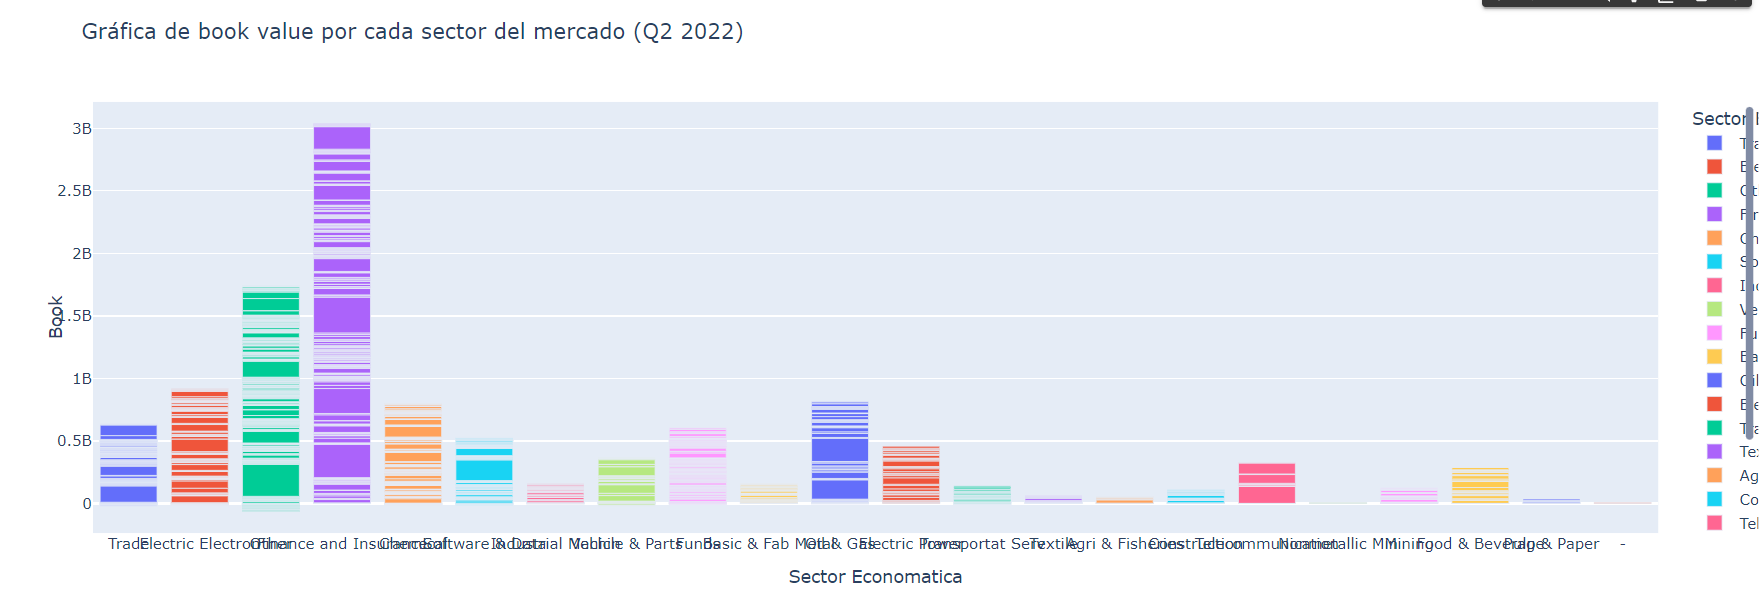

In [186]:
df[mask].describe()

,N,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,cto,lprice,r,r2,Book,Market,Ebit,OPM,Net income,Profit margin
count,3600.000000,3.600000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.362000e+03,3.362000e+03,...,3600.0,3417.000000,3402.000000,3402.000000,3.362000e+03,3.548000e+03,3.355000e+03,3354.000000,3.355000e+03,3355.000000
mean,1805.693056,1.343267e+06,8.202441e+05,3.874970e+05,2.311913e+04,-2.077210e+04,1.755578e+04,3.837393e+04,1.600486e+07,1.267312e+07,...,2.0,64.730187,-0.477583,-0.477583,3.331749e+06,1.095980e+07,2.104988e+05,NaN,1.545691e+05,NaN
std,1042.055705,6.079150e+06,4.564278e+06,1.700513e+06,2.078926e+05,2.832093e+05,6.657487e+04,2.154052e+05,1.137581e+08,1.033130e+08,...,0.0,156.302154,0.691950,0.691950,1.386098e+07,6.632062e+07,1.101036e+06,NaN,8.911040e+05,NaN
min,1.000000,-2.527940e+05,-2.443690e+05,-8.566840e+05,-2.296600e+06,-6.466000e+06,-3.150000e+05,-8.360000e+05,1.005000e+03,1.000000e+00,...,2.0,0.573000,-3.821337,-3.821337,-1.479100e+07,3.490000e+01,-3.639000e+06,-inf,-3.314000e+06,-inf
25%,904.750000,1.078750e+04,0.000000e+00,1.092300e+04,0.000000e+00,-4.033000e+03,0.000000e+00,0.000000e+00,3.060870e+05,1.089515e+05,...,2.0,12.750000,-0.779820,-0.779820,1.060878e+05,1.907523e+05,-7.164500e+03,-0.258106,-8.997500e+03,-0.265844
50%,1806.500000,1.216780e+05,2.309200e+04,5.496600e+04,0.000000e+00,-3.955078e-05,5.520000e+02,1.231000e+03,1.584068e+06,9.465275e+05,...,2.0,29.540112,-0.266420,-0.266420,4.577370e+05,1.105076e+06,1.349100e+04,0.068118,7.793000e+03,0.038571
75%,2708.250000,6.167912e+05,2.760000e+05,1.963340e+05,2.700000e+01,4.263770e+02,1.016800e+04,1.539100e+04,6.475676e+06,4.513422e+06,...,2.0,67.460000,-0.026795,-0.026795,1.792766e+06,4.607257e+06,9.709100e+04,0.211226,6.844250e+04,0.150432
max,3608.000000,1.415690e+08,1.068470e+08,5.140300e+07,7.154000e+06,3.572000e+06,1.502000e+06,6.359000e+06,3.841314e+09,3.555171e+09,...,2.0,4973.300000,1.591808,1.591808,2.861430e+08,2.212838e+09,2.307600e+07,inf,1.945200e+07,inf


Hablando del valor de mercado podemos ver un cambio interesante, ya que ahora notamos una menor disparidad entre los sectores de mercado con valores más altos. Se observa que ahora Finance and Insurance representa el tercer sector con valores más altos, contrastando así con su primer puesto en la gráfica anterior.

In [ ]:
px.bar(df[mask], x = 'Sector\nEconomatica', y = 'Market', color = 'Sector\nEconomatica', title="Gráfica de market value por cada sector del mercado (Q2 2022)")

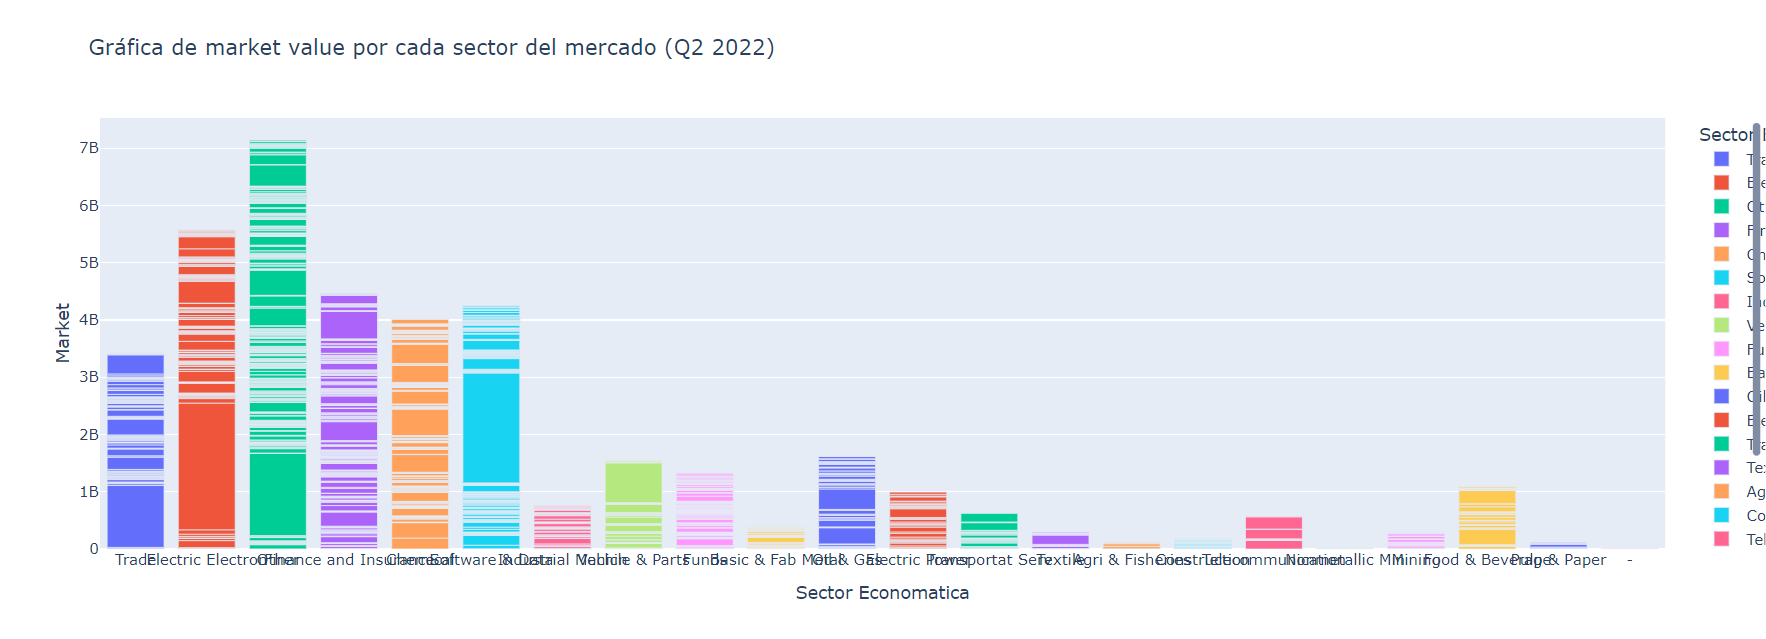

In [188]:
df_sorted_market = df.sort_values(by=['Market'], ascending=False)

## For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [189]:
opm_analysis = df[mask].dropna()
mp_analysis = df[["Sector NAICS\nlevel 1", "Book", "Market"]]

In [190]:
mp_analysis

,Sector NAICS\nlevel 1,Book,Market
0,Retail Trade,171804.0,4.566976e+05
1,Retail Trade,158918.0,3.288759e+05
2,Retail Trade,136286.0,3.199267e+05
3,Retail Trade,125752.0,2.647720e+05
4,Retail Trade,117240.0,5.134973e+05
...,...,...,...
323811,Information,3020600.0,1.157355e+07
323812,Information,3007000.0,8.221937e+06
323813,Information,3111900.0,7.169162e+06
323814,Information,2906100.0,1.046345e+07


In [ ]:
px.bar(opm_analysis, x = 'Sector\nEconomatica', y = 'Profit margin', color = 'Sector\nEconomatica', title="Profit Margin por cada sector del mercado (Q2 2022)")

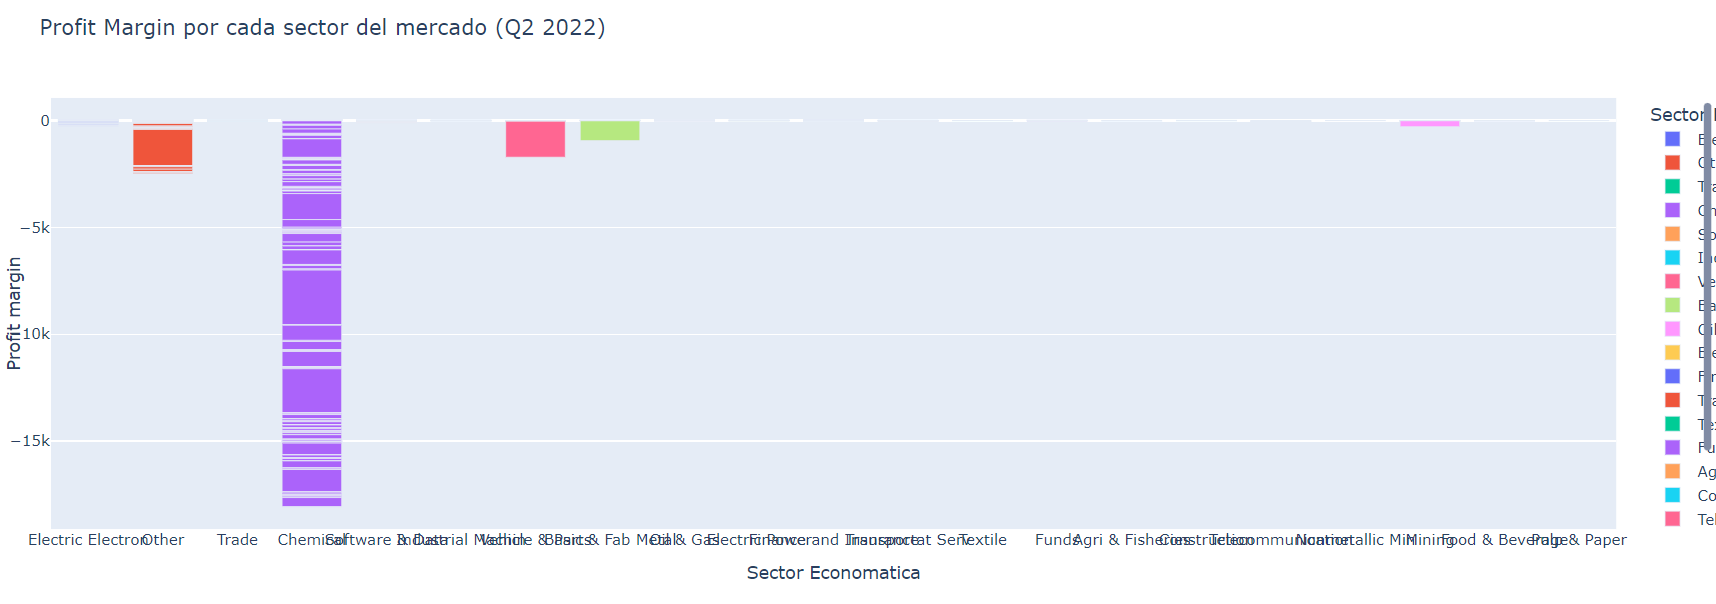

Podemos obersvar una tendencia a tener márgenes de ganancia negativos, siendo la industría química la que presenta la mayor cantidad de firmas con márgenes negativos en el último quarter de este año. 

Esta gráfica nos da visibilidad de cómo cambian los profit margins en cada sector del mercado

Ahora, veremos cuáles son los valores medianos de Market value y Book value para las empresas.

In [192]:
print("La mediana de book value es de:", mp_analysis["Book"].median())
print("La mediana de market value es de: ",mp_analysis["Market"].median())

La mediana de book value es de: 567545.0
La mediana de market value es de:  1570573.4614000001


Ahora haremos un análisis en base a distintas métricas como lo son la mediana

In [193]:
# Aqui calculamos la mediana para cada sector, tanto en book value como en market value
temp_mediana = mp_analysis.groupby("Sector NAICS\nlevel 1").median()
temp_mediana.columns = temp_mediana.columns.str.replace('Book', 'Book median')
temp_mediana.columns = temp_mediana.columns.str.replace('Market', 'Market median')


In [194]:
temp_std = mp_analysis.groupby("Sector NAICS\nlevel 1").std()
temp_std.columns = temp_std.columns.str.replace('Book', 'Book std')
temp_std.columns = temp_std.columns.str.replace('Market', 'Market std')
temp_std


,Book std,Market std
Sector NAICS level 1,,
-,2.178608e+06,6.996257e+05
Accommodation and Food Services,2.782651e+06,1.994720e+07
Administrative and Support and Waste Management and Remediation Services,4.789996e+06,4.502293e+07
"Agriculture, Forestry, Fishing and Hunting",4.367089e+06,1.027981e+07
"Arts, Entertainment, and Recreation",1.609463e+07,4.875064e+07
Construction,2.211901e+06,3.851690e+06
Educational Services,8.972950e+05,1.937778e+06
Finance and Insurance,1.968655e+07,2.471185e+07
Health Care and Social Assistance,2.120261e+06,6.547234e+06


In [195]:
df_profit_comparison = pd.merge(temp_std, temp_mediana,  on="Sector NAICS\nlevel 1")

In [196]:
df_profit_comparison.head()

,Book std,Market std,Book median,Market median
Sector NAICS level 1,,,,
-,2.178608e+06,6.996257e+05,5546512.5,5.463857e+06
Accommodation and Food Services,2.782651e+06,1.994720e+07,368835.0,2.061916e+06
Administrative and Support and Waste Management and Remediation Services,4.789996e+06,4.502293e+07,417280.0,1.787995e+06
"Agriculture, Forestry, Fishing and Hunting",4.367089e+06,1.027981e+07,1038334.0,1.769082e+06
"Arts, Entertainment, and Recreation",1.609463e+07,4.875064e+07,323850.0,2.932455e+06


Ahora podemos hacer comparaciones de estos indicadores de manera visual a lo largo de las industrias.

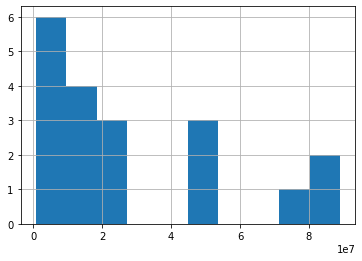

In [197]:
df_profit_comparison['Market std'].hist()

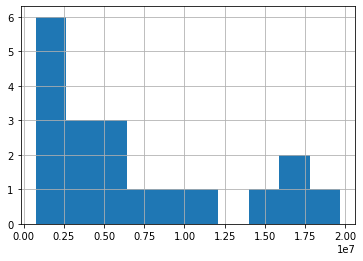

In [198]:
df_profit_comparison['Book std'].hist()


Resulta interesante observar que conforme más pequeño sea el valor de libro o el valor de mercado de la firma, mayor será su error estándar. Sabemos que el error estándar representa la distancia en desviaciones estándar de la media, por lo que también vemos que la media aritmetica no se encuentra en el centro, si no que se encuentra cargada hacia la derecha. Por lo tanto, corroboramos que la media aritmética no es una variable muy confiable para representar el tamaño de una empresa promedio.

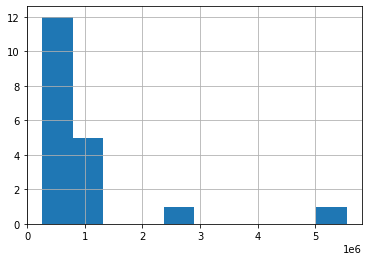

In [199]:
df_profit_comparison['Book median'].hist()

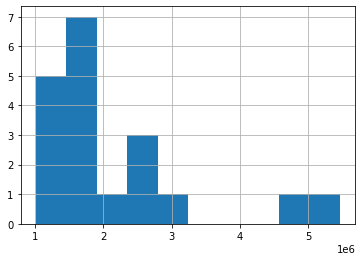

In [200]:
df_profit_comparison['Market median'].hist()


En este par de histogramas sobre la mediana apreciamos que tenemos una carga de datos a la izquierda. Esto es un claro indicador de que solo ciertas categorías de empresas en específico son las que manejan valores más grandes, haciendo que el resto de categorías se agrupen en el extremo inferior, situándolas bastante por debajo del valor mediano que estos sectores exitosos propiciaron.


## Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [201]:
mask = df['q']=='2022q2' 
df_top10_market = df[mask]
df_top10_book = df[mask]
df_sorted_market =  df_top10_market.sort_values('Market', ascending=False).head(10)
df_sorted_book = df_top10_book.sort_values('Book', ascending=False).head(10)

In [202]:
df_sorted_book[["firm", "Book"]]


,firm,Book
160545,JPM,286143000.0
38153,BAC,269118000.0
14573,GOOGL,255419000.0
67410,C,199626000.0
109530,XOM,184508000.0
314185,WFC,179793000.0
189073,MSFT,166542000.0
64890,CVX,154562000.0
30863,T,135307000.0
15653,AMZN,131402000.0


Resulta muy interesante notar que los valores del top 10 de empresas son considerablemente mayores al valor que se encuentra en la mediana, el cual es de 457737. 

Si comparamos el top 1 contra la mediana, encontramos que el top 1 tiene más de 600 veces el valor de libro que la empresa mediana del dataset.

In [ ]:
px.histogram(df[mask]['Market'])


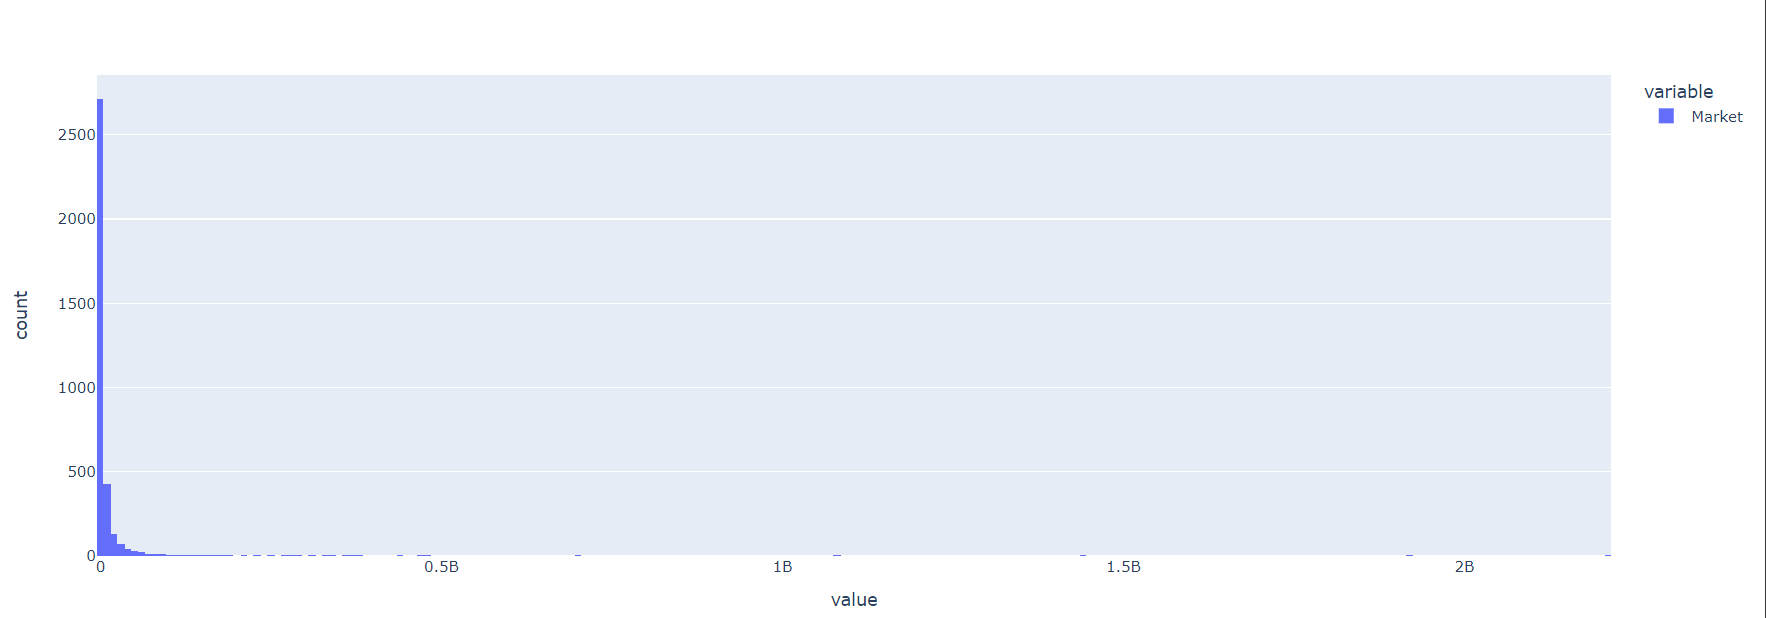

En este caso notamos una tendencia de los datos hacia la izquierda de la grafica, por lo que sabemos que la media no seria un dato representativo. Esto es porque los datos que se encuentran en el extremo derecho están tan distanciados del resto de los datos que terminan subiendo mucho el promedio.
Por lo tanto, en estas situaciones resulta mejor usar la mediana para acompletar datos faltantes, y no la media.

## Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [204]:
df_sorted_market[["firm", "Market"]]

,firm,Market
23663,AAPL,2.212838e+09
189073,MSFT,1.920840e+09
14573,GOOGL,1.435042e+09
15653,AMZN,1.080624e+09
281245,TSLA,6.976698e+08
298795,UNH,4.818731e+08
160095,JNJ,4.671001e+08
187453,META,4.363946e+08
207635,NVDA,3.789750e+08
308875,V,3.743426e+08


In [205]:
df_sorted_market["Market"].median()

589771442.071195

Vemos que los valores de las empresas más grandes del sample, como es el caso de APPL, MSFT, GOOGL y AMZN son considerablemente superiores a la mediana, muy similar a lo observado con el book value

In [ ]:
px.histogram(df[mask]['Book'])


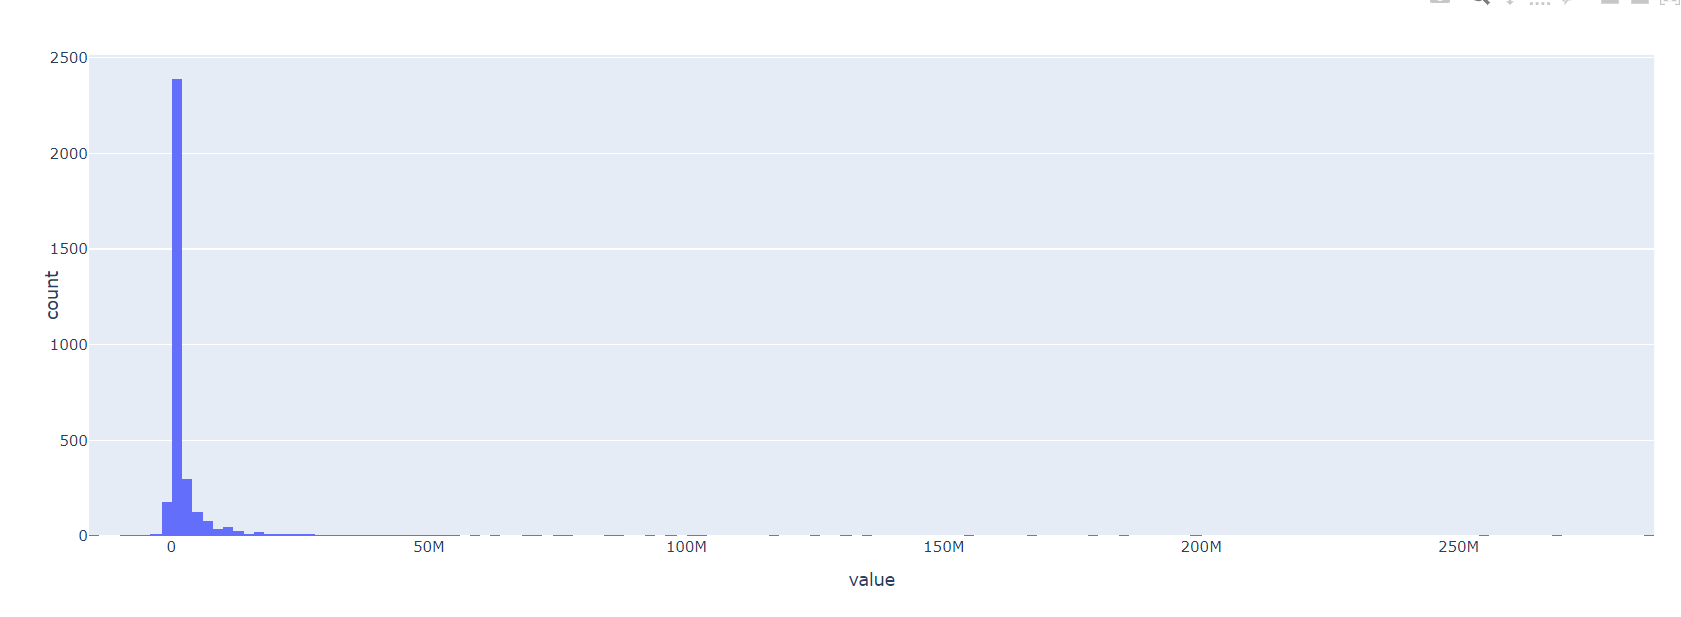

En este caso, ocurre lo mismo con la distribución de los datos comparado con la del book value

# 2.2.1.2 Considering the whole history of financial data for all firms:


### How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

Para este punto, intento hallar cuales son las medidas que tienen una mayor relación con las ventas que tiene una firma. 
En este ejercicio es posible identificar una alta correlación con el cogs, el sgae y el stock holder equity.

In [207]:
df_corrs = df.corr()["revenue"]
df_corrs.sort_values( ascending = False)
df_corrs


N                   -0.009373
revenue              1.000000
cogs                 0.931408
sgae                 0.677615
otheropexp           0.333943
extraincome         -0.025453
finexp               0.379055
incometax            0.449182
totalassets          0.323052
totalliabilities     0.275016
shortdebt            0.289621
longdebt             0.377617
stockholderequity    0.595084
adjprice            -0.002762
originalprice        0.151374
sharesoutstanding    0.493223
fiscalmonth          0.001395
year                 0.067998
cto                  0.001319
lprice              -0.002971
r                    0.030406
r2                   0.030406
Book                 0.595077
Market               0.614452
Ebit                 0.589684
OPM                  0.005302
Net income           0.487594
Profit margin        0.005425
Name: revenue, dtype: float64

## Calculate and explain earnings per share deflated by price.



In [208]:
df['EPS'] = df["Net income"] / df["sharesoutstanding"]
df['EPSP'] =  df["EPS"] / df["originalprice"]

In [209]:
df[['firm', "EPSP"]].dropna()

,firm,EPSP
0,FLWS,-0.042426
1,FLWS,-0.039337
2,FLWS,-0.070607
3,FLWS,-0.041058
4,FLWS,-0.016721
...,...,...
323810,ZNGA,-0.002885
323811,ZNGA,0.003188
323812,ZNGA,-0.004999
323813,ZNGA,-0.007937


El earnings per share es una medida que nos permite saber que tantas ganancias se están obteniendo por cada acción de la empresa. Sin embargo, esta medición se puede ver afectada por factores como el precio de la acción. Para obtener una métrica más representativa, agregamos el factor del precio al cálculo del EPS, para teminar obteniendo el EPSP.

# 2.2.2 About statistical modeling

In [210]:
# Carga de datos
usdata = pd.read_csv('us2022q2a.csv')
usfirms = pd.read_csv('usfirms2022.csv')
# Unimos la información de ambos datasets en un solo dataframe
usfirms.columns = usfirms.columns.str.replace('Ticker', 'firm')
df = pd.merge(usfirms, usdata, on="firm")
# df = df.replace(np.nan,0)

# Se obtienen los valores calculados 

df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")

df.set_index(['firm', 'qdate'], drop = True)
df = df.replace(0,np.nan)

df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['r'] = np.log(df['adjprice']) - np.log(df['lprice'])
df['r2']= np.log(df['adjprice']) - np.log(df.groupby(['firm'])['adjprice'].shift(4))
df.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]
df[['q', 'adjprice', 'lprice']]
df.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98]
df["ReturnOnNextQuarter"] = df.groupby(["firm"])["r2"].shift(-1)



# Calculamos las variables para cada instancia de los datos
df['Book'] = df['totalassets'] - df['totalliabilities']
df['Market'] = df['originalprice'] * df['sharesoutstanding']
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df["OPM"] = df["Ebit"] / df["revenue"]
df["Net income"] = df["Ebit"] - df["incometax"] - df["finexp"]
df["Profit margin"] = df["Net income"] / df["revenue"]

df = df.replace(np.nan,0)


In [211]:
df.columns

Index(['firm', 'Name', 'N', 'Class', 'Country\nof Origin', 'Type of Asset',
       'Sector NAICS\nlevel 1', 'Exchange / Src', 'Sector\nEconomatica',
       'Sector NAICS\nlast available', 'partind', 'q', 'revenue', 'cogs',
       'sgae', 'otheropexp', 'extraincome', 'finexp', 'incometax',
       'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fiscalmonth', 'year', 'cto', 'qdate', 'lprice', 'r', 'r2',
       'ReturnOnNextQuarter', 'Book', 'Market', 'Ebit', 'OPM', 'Net income',
       'Profit margin'],
      dtype='object')

## Financial services: Primer acercamiento

In [212]:
df.columns

Index(['firm', 'Name', 'N', 'Class', 'Country\nof Origin', 'Type of Asset',
       'Sector NAICS\nlevel 1', 'Exchange / Src', 'Sector\nEconomatica',
       'Sector NAICS\nlast available', 'partind', 'q', 'revenue', 'cogs',
       'sgae', 'otheropexp', 'extraincome', 'finexp', 'incometax',
       'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fiscalmonth', 'year', 'cto', 'qdate', 'lprice', 'r', 'r2',
       'ReturnOnNextQuarter', 'Book', 'Market', 'Ebit', 'OPM', 'Net income',
       'Profit margin'],
      dtype='object')

En la siguiente gráfica podemos ver un panorama general de cómo ha variado históricamente el valor de libro de cada empresa del sector.

In [ ]:
rslt_df = df.loc[df["Sector NAICS\nlevel 1"].isin(['Finance and Insurance', 'Real Estate and Rental and Leasing'  ])]
px.line(rslt_df, x = 'q', y = 'Book', color = "firm", title="Gráfica de book value histórico de cada firma de Finance and Insurance")


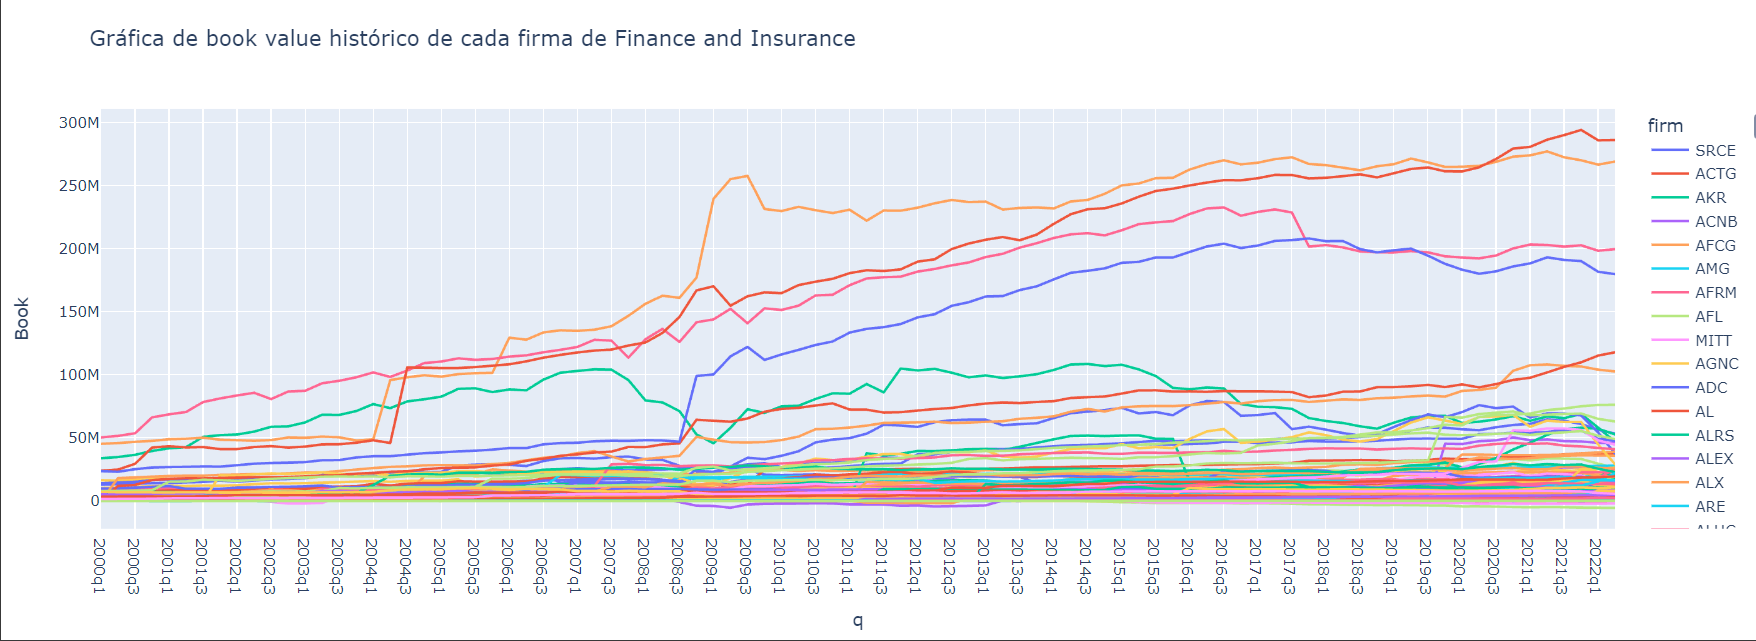

## Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.



A continuación, graficaremos cómo se relacionan las distintas variables con el fin de buscar alguna que pueda tener correlación con el stock return que se tiene

In [214]:
from scipy.stats.mstats import winsorize

# Seleccionamos solo los valores que nos serán de utilidad en este análisis

df_analysis = rslt_df[['firm','q','r2', 'originalprice', 'ReturnOnNextQuarter', 'cogs', 'sgae', 'otheropexp', 'revenue', 'Ebit','OPM', 'Book', 'Market', 'Profit margin']]

# Calculamos las nuevas variables 

#primero llenamos los NaN en todos los valores nulos en los divisores

df = df.replace(0,np.nan)
df_analysis = df_analysis.replace(0,np.nan)

df_analysis["Ebit"] = df["Ebit"].fillna(0)
df_analysis["OPM"] = df["Ebit"] / df["revenue"]
df_analysis['BookToMarketRatio'] = df['Book'] / df['Market']
df_analysis['ShortFinancialLeverage'] = df["shortdebt"] / df["totalassets"] 
df_analysis['LongFinancialLeverage'] = df["longdebt"] / df["totalassets"] 
df_analysis['OperatingProfitGrowth'] = (df["Ebit"] - df["Ebit"].shift(4)) - 1
df_analysis['SalesAnnualGrowth'] = (df["revenue"] / df["revenue"].shift(4)) - 1 
df_analysis['EPS'] = df["Net income"] / df["sharesoutstanding"]
df_analysis["lprice"] = df["lprice"]
df_analysis['EPSP'] =  df_analysis["EPS"] / df_analysis["originalprice"]
df_analysis['Size'] =  df["Market"] 


# Aplicamos la winzorización a nuestros ratios
df_analysis["OPM"] = winsorize(df_analysis["OPM"], limits=[0.0001, 0.02])
df_analysis["BookToMarketRatio"] = winsorize(df_analysis["BookToMarketRatio"], limits=[0.0001, 0.02])
df_analysis["ShortFinancialLeverage"] = winsorize(df_analysis["ShortFinancialLeverage"], limits=[0.0001, 0.02])
df_analysis["OperatingProfitGrowth"] = winsorize(df_analysis["OperatingProfitGrowth"], limits=[0.0001, 0.02])
df_analysis["EPSP"] = winsorize(df_analysis["EPSP"], limits=[0.0001, 0.02])
df_analysis["OperatingProfitGrowth"] = winsorize(df_analysis["OperatingProfitGrowth"], limits=[0.0001, 0.02])
df_analysis["SalesAnnualGrowth"] = winsorize(df_analysis["SalesAnnualGrowth"], limits=[0.0001, 0.02])

df_analysis = df_analysis.replace(np.nan,0)


In [215]:
# En este código lo que se hace es regresar el valor del percentil con respecto al set de datos que recibe la función.
# Esta función va a recibir uno por uno cada quarter, lo que nos hara que regrese el valor del percentil para cada instancia 
# CON RESPECTO A SU QUARTER, NO CON RESPECTO A TODO EL SET DE DATOS

def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

# Aqui mandamos a llamar dicha funcion de tal forma que se llame para cada quarter
df_analysis["pct"]=df_analysis.groupby('q').Market.apply(dense_inclusive_pct).astype(int)

# Aqui genero las variables dummies en base a lo mencionado previamente.
df_analysis["small?"] = df_analysis.pct <= 33
df_analysis["small?"] = df_analysis["small?"].astype(int)

df_analysis["medium?"] = (df_analysis.pct <= 66) & (df_analysis.pct > 33) 
df_analysis["medium?"] = df_analysis["medium?"].astype(int)




In [216]:
df_analysis.columns

Index(['firm', 'q', 'r2', 'originalprice', 'ReturnOnNextQuarter', 'cogs',
       'sgae', 'otheropexp', 'revenue', 'Ebit', 'OPM', 'Book', 'Market',
       'Profit margin', 'BookToMarketRatio', 'ShortFinancialLeverage',
       'LongFinancialLeverage', 'OperatingProfitGrowth', 'SalesAnnualGrowth',
       'EPS', 'lprice', 'EPSP', 'Size', 'pct', 'small?', 'medium?'],
      dtype='object')

In [ ]:
df_analysis = df_analysis.replace(np.nan,0)
pd.plotting.scatter_matrix(df_analysis, alpha=0.2)


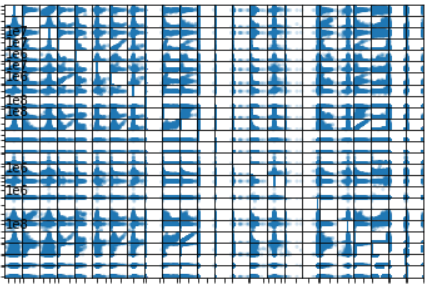

Vemos que es difícil encontrar alguna variable que parezca tener una correlación. Para verlo numéricamente, imprimiremos los valores de la correlación de pearson

In [218]:
df_analysis.corr(method="pearson")

,r2,originalprice,ReturnOnNextQuarter,cogs,sgae,otheropexp,revenue,Ebit,OPM,Book,...,LongFinancialLeverage,OperatingProfitGrowth,SalesAnnualGrowth,EPS,lprice,EPSP,Size,pct,small?,medium?
r2,1.000000,0.162365,0.688567,0.019690,0.006357,-0.006027,0.027393,0.052957,0.003893,0.016190,...,0.051474,0.047650,-0.002736,0.000932,-0.004421,0.093896,0.069936,0.166915,-0.148293,0.069877
originalprice,0.162365,1.000000,0.126026,0.162559,0.156049,0.022159,0.223209,0.102986,0.001129,0.146168,...,0.163957,0.014237,0.016111,0.002239,0.848991,0.012981,0.271372,0.481721,-0.409369,0.103795
ReturnOnNextQuarter,0.688567,0.126026,1.000000,0.016003,0.006112,-0.006711,0.025091,0.047771,0.002460,0.014958,...,0.054193,0.049680,0.002188,0.000931,-0.002532,0.083745,0.050130,0.147427,-0.132123,0.069856
cogs,0.019690,0.162559,0.016003,1.000000,0.094411,0.174588,0.809152,0.216252,0.000093,0.288062,...,0.039420,0.027398,0.000990,-0.001358,0.153603,0.008875,0.475626,0.174445,-0.114099,-0.031559
sgae,0.006357,0.156049,0.006112,0.094411,1.000000,0.037420,0.554184,0.087136,-0.000251,0.256041,...,0.010618,0.004238,-0.000718,-0.001393,0.264317,0.003674,0.246748,0.305434,-0.230493,-0.017230
otheropexp,-0.006027,0.022159,-0.006711,0.174588,0.037420,1.000000,0.159787,0.149773,-0.000062,0.024550,...,0.019405,-0.078179,-0.000113,-0.000241,0.017000,-0.098861,0.036386,0.044731,-0.034163,0.000270
revenue,0.027393,0.223209,0.025091,0.809152,0.554184,0.159787,1.000000,0.200147,-0.000342,0.612088,...,0.038939,0.025182,0.000430,-0.001382,0.272551,0.010208,0.703424,0.366735,-0.256782,-0.045042
Ebit,0.052957,0.102986,0.047771,0.216252,0.087136,0.149773,0.200147,1.000000,-0.001534,0.035237,...,0.094717,0.398557,0.000543,-0.007792,0.081829,0.217719,0.093372,0.122084,-0.087976,-0.017726
OPM,0.003893,0.001129,0.002460,0.000093,-0.000251,-0.000062,-0.000342,-0.001534,1.000000,-0.000539,...,0.008176,-0.015692,-0.000044,-0.000116,0.000500,-0.039810,0.000082,0.003692,-0.006879,0.008425
Book,0.016190,0.146168,0.014958,0.288062,0.256041,0.024550,0.612088,0.035237,-0.000539,1.000000,...,0.034793,0.002421,-0.000636,0.001671,0.181123,0.004233,0.842133,0.356727,-0.244868,-0.046586


Vemos que los valores de correlación son bastante bajos. Sin embargo, existen algunas variables que presentan una correlación con una magnitud superior a 0.1, lo cual nos hace considerarlas como candidatas a ser variables descriptivas en nuestra modelación.

In [219]:
df_analysis.describe()

,r2,originalprice,ReturnOnNextQuarter,cogs,sgae,otheropexp,revenue,Ebit,OPM,Book,...,LongFinancialLeverage,OperatingProfitGrowth,SalesAnnualGrowth,EPS,lprice,EPSP,Size,pct,small?,medium?
count,69123.000000,69123.000000,69123.000000,6.912300e+04,6.912300e+04,6.912300e+04,6.912300e+04,6.912300e+04,69123.000000,6.912300e+04,...,69123.000000,6.912300e+04,69123.000000,6.912300e+04,69123.000000,69123.000000,6.912300e+04,69123.000000,69123.000000,69123.000000
mean,0.043168,23.687907,0.043168,1.347296e+05,1.988920e+05,2.135918e+03,4.702571e+05,2.957099e+03,0.010109,2.732080e+06,...,0.113257,2.940115e+02,1.781133,-3.731734e+01,17.761971,-0.000180,3.985850e+06,26.230112,0.650536,0.174414
std,0.256268,58.420461,0.256268,1.520964e+06,1.102140e+06,5.082499e+04,2.346612e+06,4.563231e+04,2.239958,1.426001e+07,...,0.204627,2.640793e+04,193.689420,6.767908e+03,53.448681,0.015843,1.796592e+07,32.469682,0.476804,0.379468
min,-3.751359,0.000000,-3.751359,-1.942500e+05,-2.995000e+06,-1.389770e+06,-4.788351e+06,-1.539000e+06,-6.726768,-5.438611e+06,...,0.000000,-1.150001e+06,-17.604934,-1.650000e+06,0.000000,-1.077582,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,6.895000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.219000e+03,0.000000e+00,0.000000,7.552800e+04,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.986867e+04,5.000000,1.000000,0.000000
75%,0.103988,28.750000,0.103988,1.189000e+03,1.993750e+04,0.000000e+00,1.312480e+05,0.000000e+00,0.000000,1.100175e+06,...,0.108917,0.000000e+00,0.065012,0.000000e+00,19.202000,0.000000,1.757570e+06,52.000000,1.000000,0.000000
max,3.417378,1599.740000,3.417378,7.320000e+07,4.778200e+07,3.491000e+06,8.033200e+07,2.639000e+06,588.077670,2.941270e+08,...,2.972546,1.439999e+06,37821.000000,1.602907e+01,1567.458874,0.493672,4.837475e+08,100.000000,1.000000,1.000000


In [ ]:
px.histogram(df_analysis['Book'])

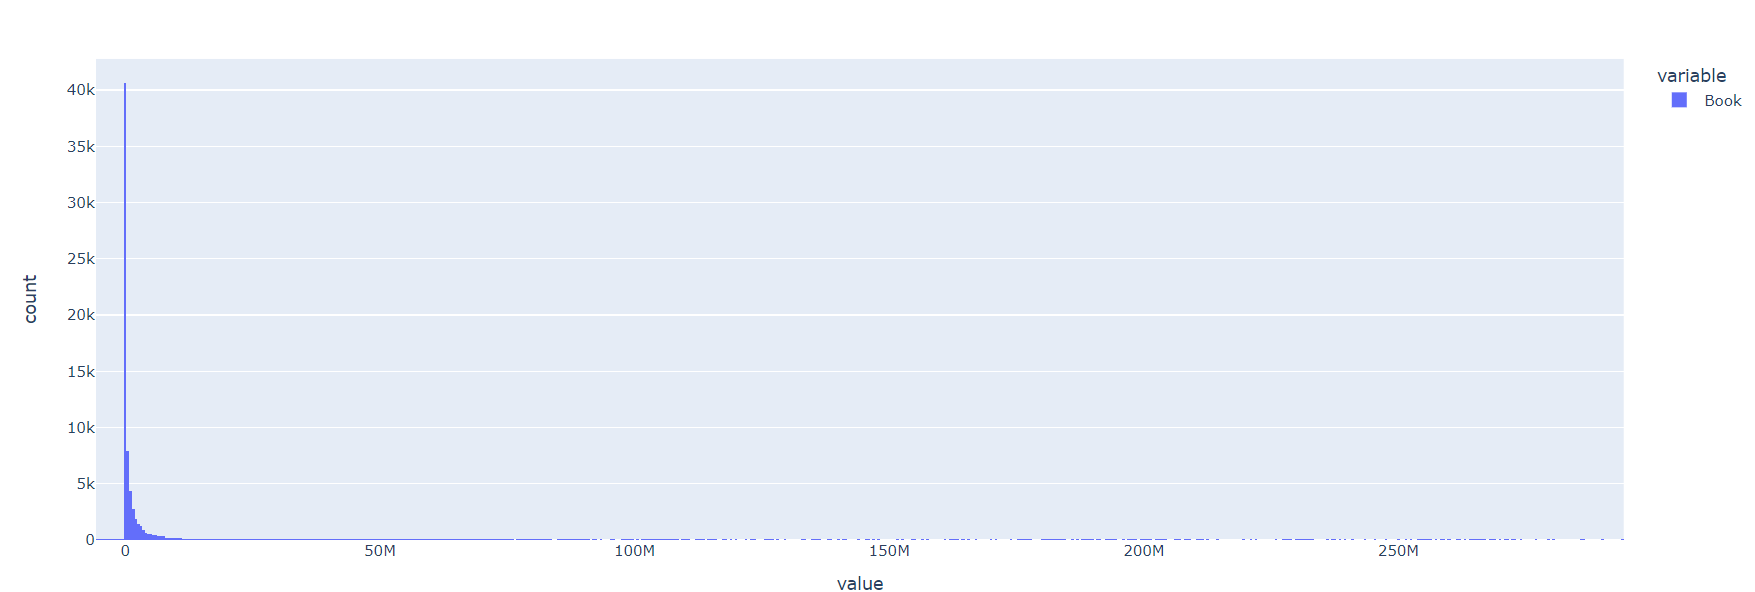

Vemos que los datos se encuentran altamente agrupados a la izquierda, esto es porque hay valores muy extremos que rompen con lo "normal". 



In [221]:
q2_2022 = df['q']=='2022q2' 

### OPM

In [ ]:
px.histogram(df_analysis['OPM'])

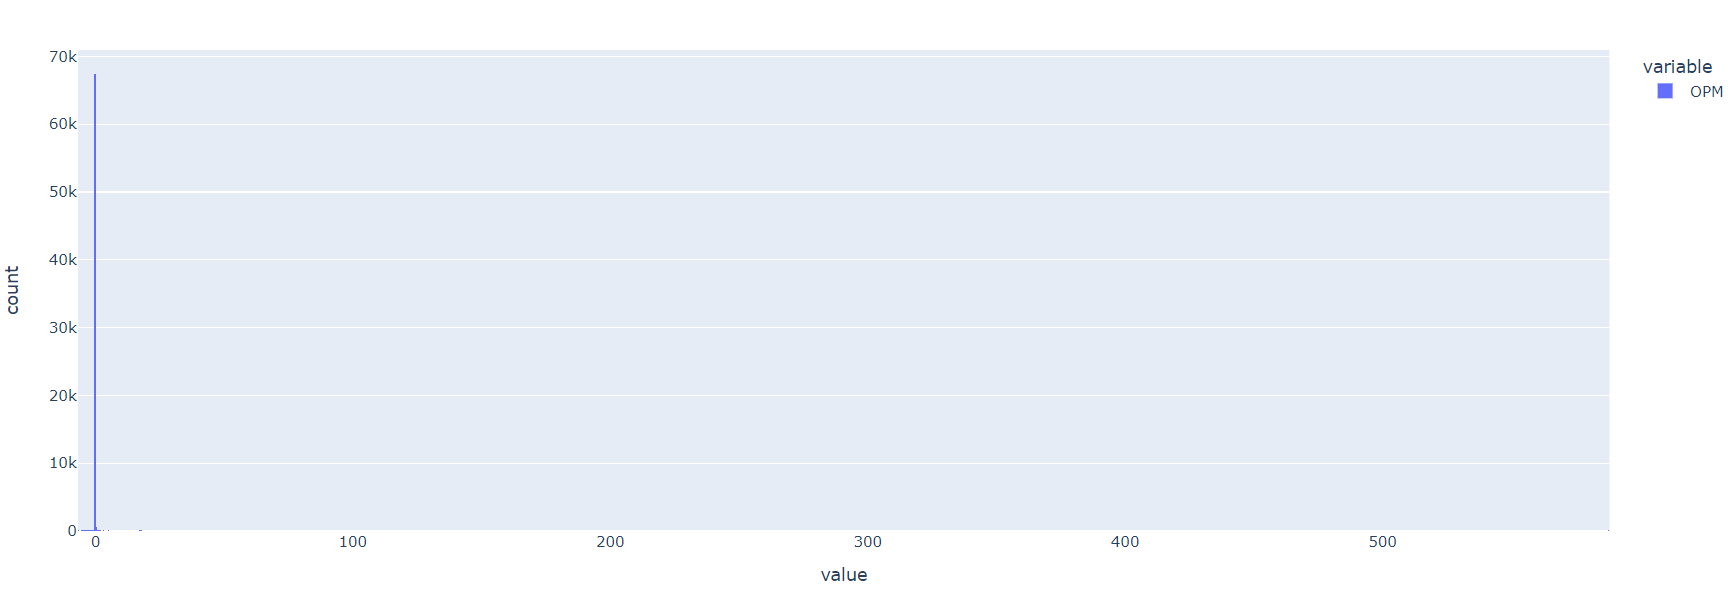

Para el OPM, podemos ver que los valores extremos se encuentran agrupados a la izquierda, algo bastante curioso considerando que en la mayoría de variables este tailoring se observa con mayor intensidad del lado derecho. 

Esta variable puede estar relacionada  con el retorno porque directamente representa una ganancia para la firma. Sin embargo, obtener retornos de una acción no solo dependerá de si la empresa tiene un buen margen de ganancias o no, por lo tanto es importante contemplar más variables en nuestro modelo.

In [223]:
df_analysis["OPM"].describe()

count    69123.000000
mean         0.010109
std          2.239958
min         -6.726768
25%          0.000000
50%          0.000000
75%          0.000000
max        588.077670
Name: OPM, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'OPM', color = 'firm', title = "Return vs OPM (Q2 2022)")

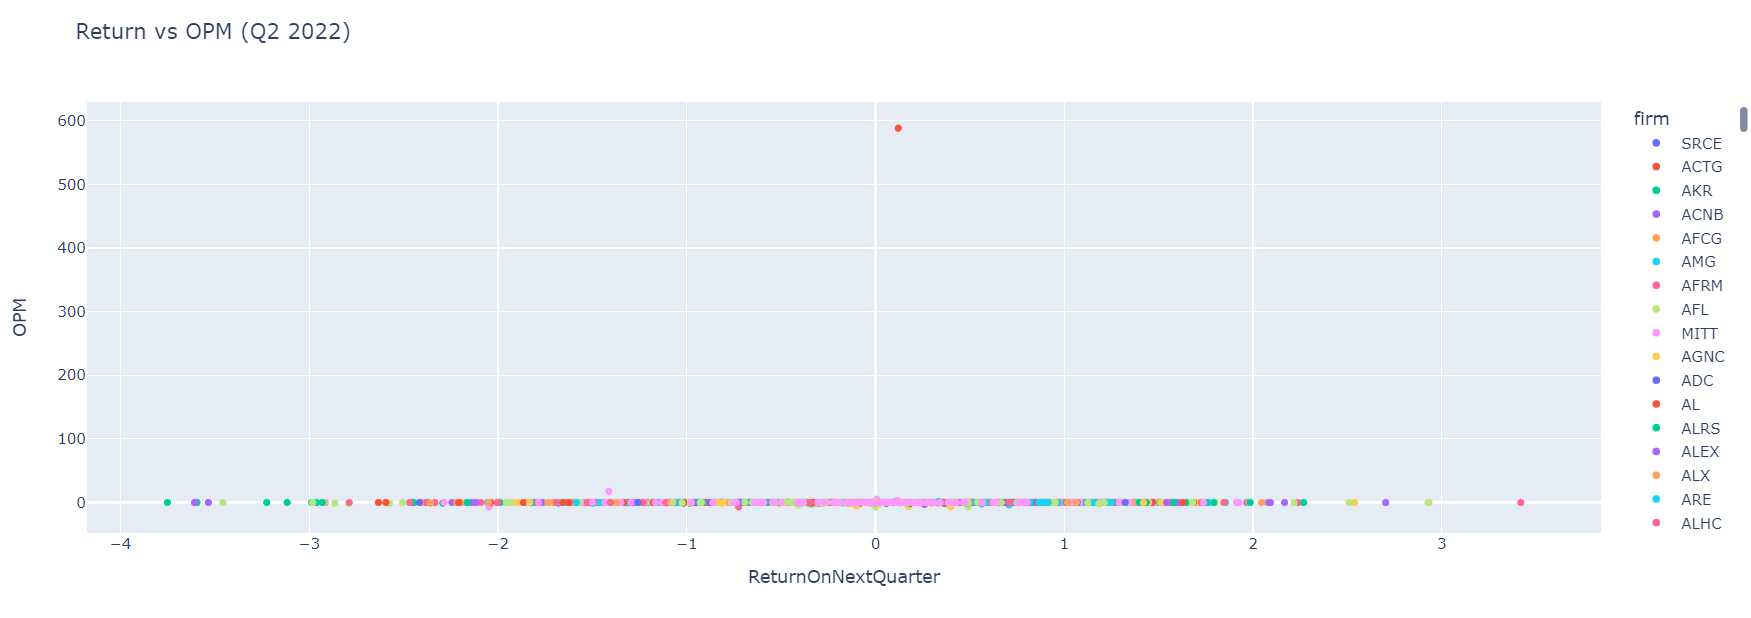

Con la gráfica de return vs OPM podemos observar que de manera general los datos presentan una ligera tenendecia positiva, aunque también vemos que existen algunos datos que parecen no seguir esta tendencia.

### Sales Annual Growth

In [ ]:
px.histogram(df_analysis['SalesAnnualGrowth'])

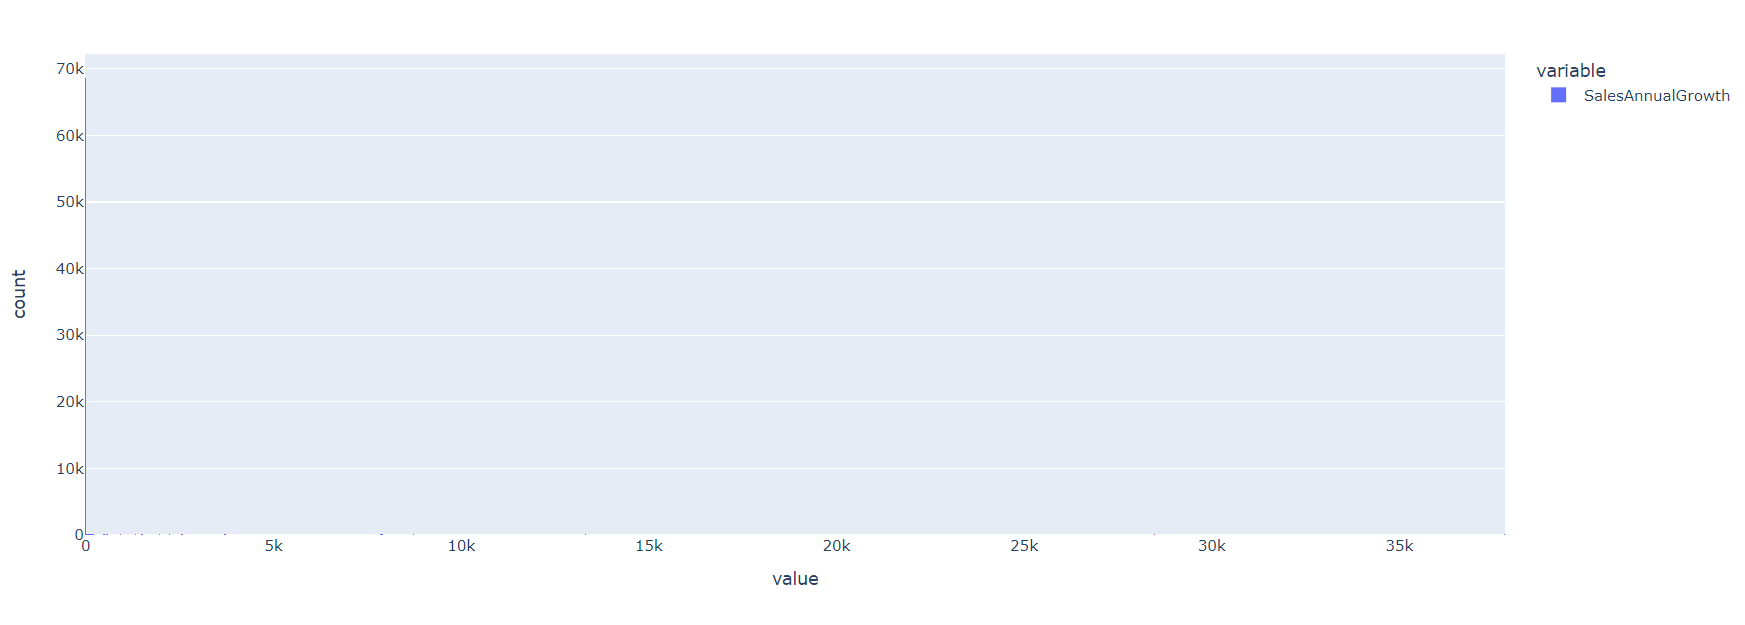

Para el Sales Annual Growth notamos que aún tenemos los datos agrupados a la izquierda.

Esta métrica nos permite saber qué tanto crecieron las ventas de una firma durante el año en cuestión. Si bien es una variable que nos habla positivamente de una empresa, es posible que esta variable no tenga tanto impacto en los retornos de la acción.


In [226]:
df_analysis["SalesAnnualGrowth"].describe()

count    69123.000000
mean         1.781133
std        193.689420
min        -17.604934
25%          0.000000
50%          0.000000
75%          0.065012
max      37821.000000
Name: SalesAnnualGrowth, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'SalesAnnualGrowth', color = 'firm', title = "Return vs Sales Annual Growth (Q2 2022)")

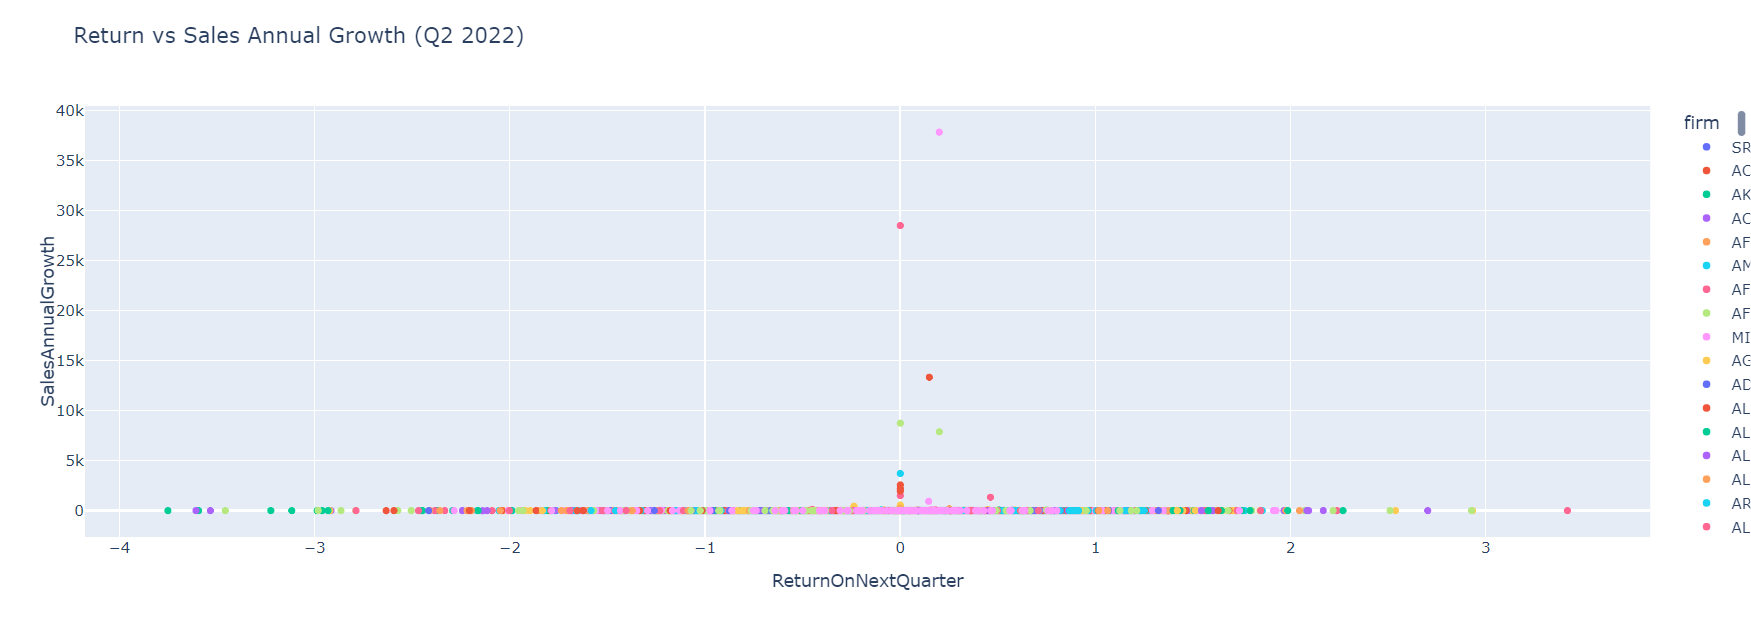

En este caso observamos también una tendencia positiva, sin embargo esta se presenta de una forma más sutl en la mayoría de los datos presentes. 

### Long Financial Leverage	

In [ ]:
px.histogram(df_analysis['LongFinancialLeverage'])

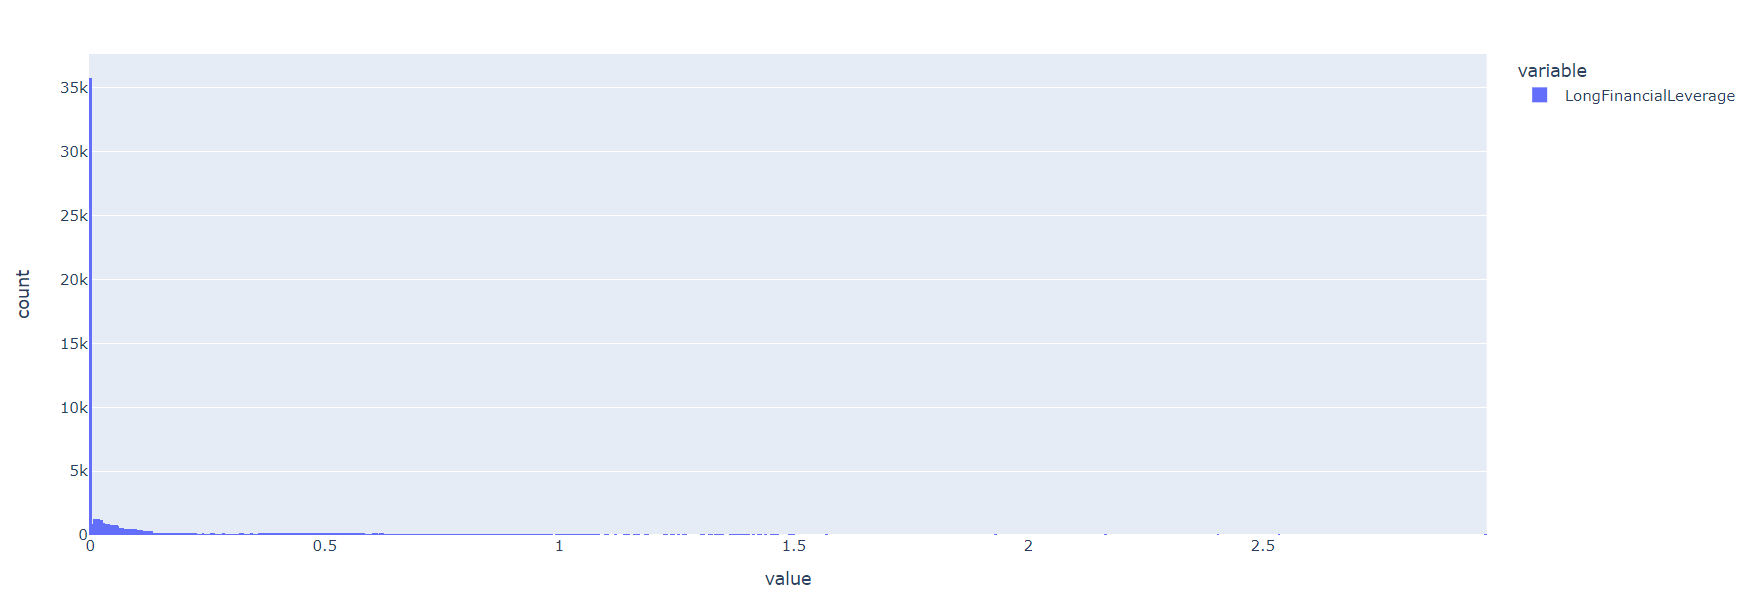

Para el long financial leverage observamos que tenemos un tailoring evidente, con la mayoría de los datos cargados a la izquierda. 

Sabemos que el financial leverage es como tal un préstamo que tiene la firma para potenciar su crecimiento, por lo que al ser un préstamo suele traducirse al pago de intereses y a posibles pérdidas si el proyecto no tiene el impacto esperado. Utilizar capital ajeno siempre representa un riesgo mayor, ya que el límite de perdidas no es solo el total del capital, si no que es el total del capital más la deuda generada en intereses por el capital.

In [229]:
df_analysis["LongFinancialLeverage"].describe()

count    69123.000000
mean         0.113257
std          0.204627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.108917
max          2.972546
Name: LongFinancialLeverage, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'LongFinancialLeverage', color = 'firm', title = "Return vs LongFinancialLeverage (Q2 2022")

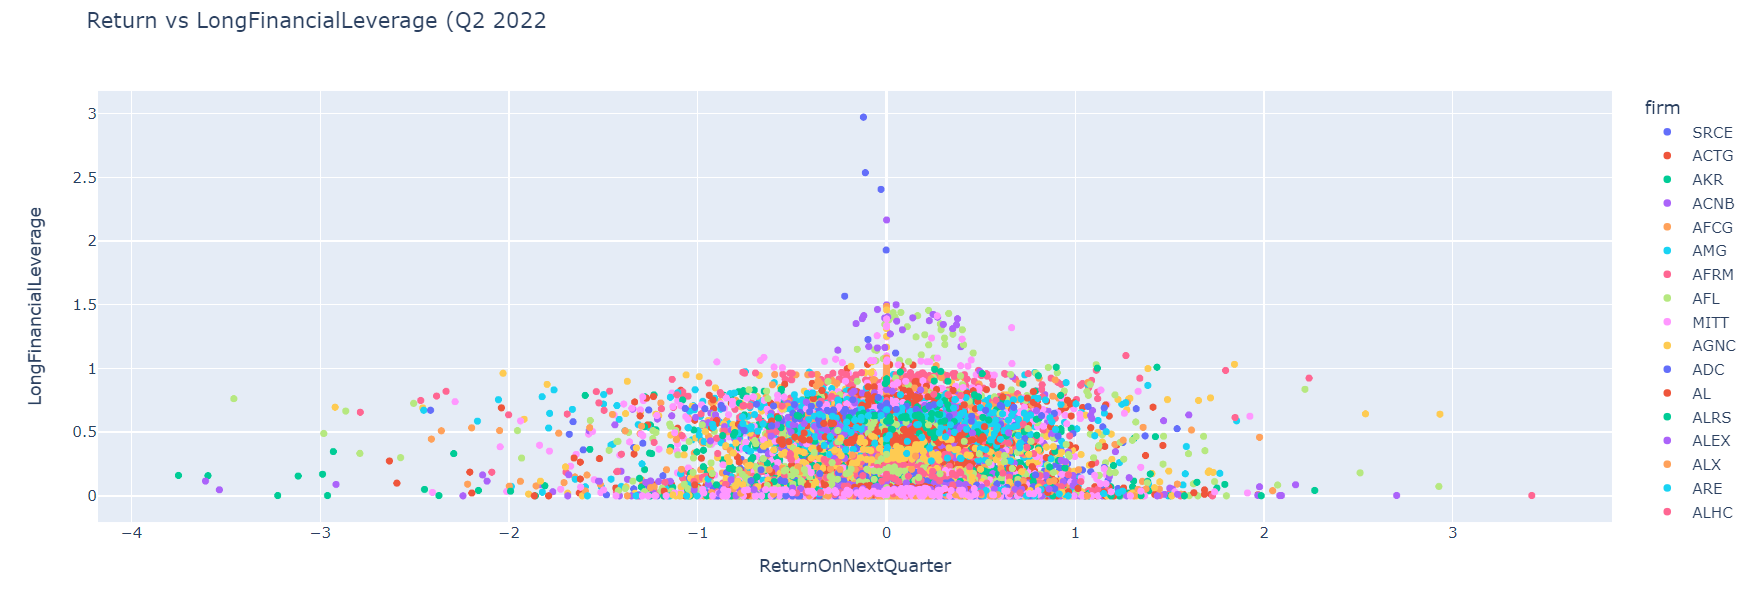

Notamos que hay un comportamiento algo irregular, pero de manera general se logra percibir una tendencia negativa al enfocarnos en el comportamiento de cada firma en particular. En los valores más bajos de retornos encontramos por lo general un valor más alto de la deuda.

### Análisis de multicolinearidad

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = df_analysis[["ReturnOnNextQuarter","EPSP","OPM", "SalesAnnualGrowth", "LongFinancialLeverage"]]

vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

                 feature       VIF
0    ReturnOnNextQuarter  1.023976
1                   EPSP  1.010040
2                    OPM  1.001686
3      SalesAnnualGrowth  1.000069
4  LongFinancialLeverage  1.018453


## Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [232]:
import statsmodels.api as sm

#add constant to predictor variables
X = df_analysis[["EPSP","OPM", "SalesAnnualGrowth", "LongFinancialLeverage", "small?", "medium?"]]
x = sm.add_constant(X)
y = df_analysis["ReturnOnNextQuarter"]
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ReturnOnNextQuarter   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     288.0
Date:                 Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                         01:31:09   Log-Likelihood:                -3114.3
No. Observations:                69123   AIC:                             6243.
Df Residuals:                    69116   BIC:                             6307.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



## Interpret your model



Antes de hacer la interpretación final, vamos a droppear la variable Sales Annual Growth, ya que vemos que tiene un bajísimo poder explicativo. Al tener un P value de 0.958 prácticamente nos estaremos equivocando siempre que utilizemos esta variable para prredecir el comportamiento de los retornos futuros. 


In [233]:

#add constant to predictor variables
X = df_analysis[["EPSP", "OPM", "LongFinancialLeverage", "small?", "medium?"]]
x = sm.add_constant(X)
y = df_analysis["ReturnOnNextQuarter"]
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                             OLS Regression Results                            
Dep. Variable:     ReturnOnNextQuarter   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     345.5
Date:                 Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                         01:31:09   Log-Likelihood:                -3114.4
No. Observations:                69123   AIC:                             6241.
Df Residuals:                    69117   BIC:                             6296.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Analizando el resultado final de nuestro modelo, podemos notar que el EPSP está relacionado de forma positiva con los retornos del próximo trimestre. Tiene el segundo mayor poder explicativo de todas las variables, estando solo por detrás del intercepto.
Además de que es la segunda variable que tiene una mayor magnitud de coeficiente, lo cual nos indica que el cambio en los retornos futuros será mayor conforme exista un cambio en una unidad de EPSP. Esta magnitud significa que cada que veamos un aumento de + 1 en el EPSP, el retorno crecerá 1.31 .

También se puede observar que el OPM tiene una relación positiva y significativa con los retornos futuros. En este caso particular vemos que el P value es de 0.198, sin embargo, recordemos que las propiedades de las variables que estamos estudiando nos permiten solamente considerar el p value de un solo lado, lo que nos dejaría con un valor de 0.095. Al ser una variable que se ha comprobado tiene relevancia en el área, considero que es de valor incluírla en el modelo a pesar de darnos una confianza menor al 95%.

Algo más a resaltar de esta relación es que es de baja magnitud, por lo que los cambios en el OPM impactan muy sutilmente en los retornos del próximo periodo.
En este caso particular, vemos que por cada + 1 que haya en el OPM, tendremos un crecimiento del .0006 en el valor del retorno del próximo periodo.

Hablando del long financial leverage, podemos obervar una relación positiva con los retornos del próximo trimestre. Esta relación es significativa y su magnitud es superior a la del OPM, por lo que los cambios en el Long Financial Leverage se ven reflejados en mayor medida en el valor de los retornos futuros; observamos que conforme la deuda a largo plazo es mayor, existe un crecimiento  en los retornos del siguiente quarter. Cuando tenemos un incremento de + 1 en el long financial leverage, veremos un crecimiento de 0.016 en el valor del retorno del next quarter.


Hablando de las variables categóricas, para este modelo se tomó como base a las empresas de tamño grande. Podemos ver que tanto la variable small como medium representan relaciones significativas y negativas, y conforme menor es el tamaño de una empresa notamos que el coeficiente incrementa su magnitud.

Mientras más negativo sea este coeficiente, los retornos serán menores, ya que estos coeficientes modifican directamente al intercepto de nuestro modelo y solamente se aplicarán cuando se cumple la condición de ser una empresa pequeña o mediana respectivamente. 
Por lo tanto, interpretamos que las firmas de mayor tamaño están teniendo mayores retornos, y conforme más pequeña sea la empresa los retornos del próximo periodo tienen a ser menores.
Las magnitudes de estos coeficientes dummies nos dicen qué tanto se va a modificar el intercepto del grupo base (empresas grandes) cuando tengamos una empresa mediana o chica respectivamente. Su signo nos dirá si este intercepto crecerá o decrecerá.

También podemos ver de forma general que las variables que están presentes en el modelo tienen una relación significante, ninguna tiene un p value superior a 0.05 (Exceptuando el OPM previamente justificado), por lo que no hay ninguna variable con la que nos estemos equivocando en más del 5% de las veces. Esta significancia es gracias a que en la ejecución que hicimos previamente del modelo encontramos una variable que tenía un poder explicativo muy bajo y la retiramos del modelo. 